#### **Name:** Britt Ahn

#### **Course:** CASMA665 <em>Mathematical Neuroscience</em>

#### **Date:** October 1, 2024

#### **Assignment:** Homework 2, <em>Hodgkin-Huxley Neuron</em>

<pre>
    
</pre>

___

<pre>
    
</pre>

## <span style="color:cornflowerblue"><ins>**Document Description**</ins></span>

Address Challenges 1-4 in the following module: <span style="color:darkgoldenrod"><ins>**mark-kramer.github.io/BU-MA665-MA666/HH.html**</ins></span>

<pre>
    
</pre>

___

<pre>
    
</pre>

## <span style="color:cornflowerblue"><ins>**Challenge 1**</ins></span>

**This section will address the following questions:**

1. Describe the dynamics during an action potential in the HH model.

2. How does the voltage change?

3. How do the gates open and close?

4. How do the ions flow?

___

#### **First, define the HH model.**

Define functions for the main HH equations.


In [5]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [38]:
# Define alpha and beta functions for activation/inactivation variables m, h, n.

def alphaM(V):
    return (2.5-0.1*(V+65)) / (np.exp(2.5-0.1*(V+65)) -1)

def betaM(V):
    return 4*np.exp(-(V+65)/18)

def alphaH(V):
    return 0.07*np.exp(-(V+65)/20)

def betaH(V):
    return 1/(np.exp(3.0-0.1*(V+65))+1)

def alphaN(V):
    return (0.1-0.01*(V+65)) / (np.exp(1-0.1*(V+65)) -1)

def betaN(V):
    return 0.125*np.exp(-(V+65)/80)

In [98]:
"""
Define a function for the Hodgkin-Huxley equations.

Function name: HH

Args:
I0 -- input current
T0 -- duration of simulation, to be converted to milliseconds by time step dt
gK0_i -- max potassium conductance
gNa0_i -- max sodium conductance

Returns:
V -- voltage array
m -- sodium activation variable array
h -- sodium inactivation variable array
n -- potassium activation variable array
t -- time array (milliseconds)
"""

# Define an array called HH which takes arguments I0, T0
def HH(I0,T0, gK0_i, gNa0_i):

    # Define biological constants
    gNa0 = gNa0_i   # sodium conductance [mS/cm^2]
    ENa  = 125;     # equilibrium or Nernst potential for sodium [mV]
    gK0  = gK0_i;   # potassium conductance [mS/cm^2]
    EK   = -12;     # equilibrium or Nernst potential for potassium [mV]
    gL0  = 0.3;     # leak conductance [mS/cm^2]
    EL   = 10.6;    # equilibrium or Nernst potential for leak [mV]

    # Define a maximum duration of the simulation in milliseconds
    dt = 0.01;                # time step
    T  = int(np.ceil(T0/dt))

    # Initialize an array of times, voltages, activation/inactivation variables (m, h, n)
    t = np.arange(0,T)*dt  # [ms]
    V = np.zeros([T,1])
    m = np.zeros([T,1])
    h = np.zeros([T,1])
    n = np.zeros([T,1])

    # Define initial values for voltages, activation/inactivation variables (m, h, n)
    V[0]=-70.0  # mV
    m[0]=0.05   # m, h, n have no units because they are probabilities!! from [0,1]
    h[0]=0.54
    n[0]=0.34

    # Apply a numerical method (i.e. forward Euler) to compute the next value in the arrays for:
    for i in range(0,T-1):
        
        # Voltage
        V[i+1] = V[i] + dt*(gNa0*m[i]**3*h[i]*(ENa-(V[i]+65)) + gK0*n[i]**4*(EK-(V[i]+65)) + gL0*(EL-(V[i]+65)) + I0);

        # Sodium activation 
        m[i+1] = m[i] + dt*(alphaM(V[i])*(1-m[i]) - betaM(V[i])*m[i]);

        # Sodium inactivation
        h[i+1] = h[i] + dt*(alphaH(V[i])*(1-h[i]) - betaH(V[i])*h[i]);

        # Potassium activation
        n[i+1] = n[i] + dt*(alphaN(V[i])*(1-n[i]) - betaN(V[i])*n[i]);
   
    return V,m,h,n,t

#### **Next, call the function HH defined above.**

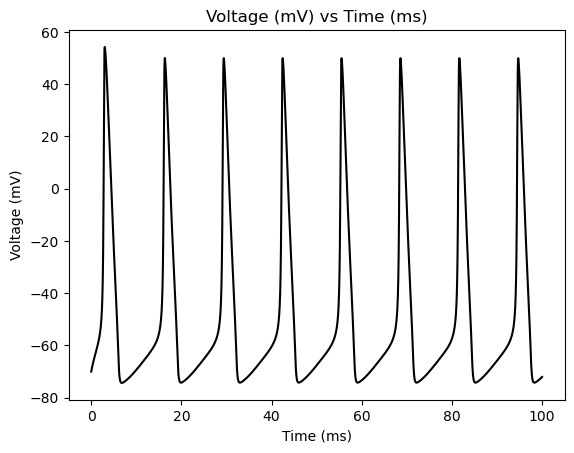

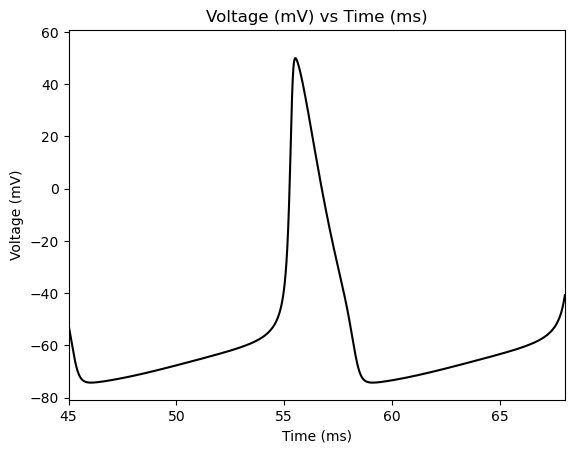

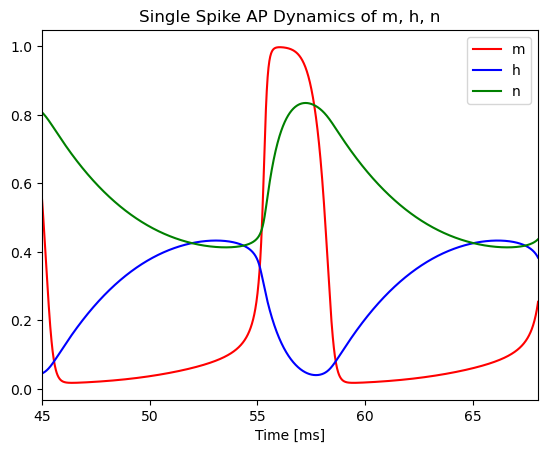

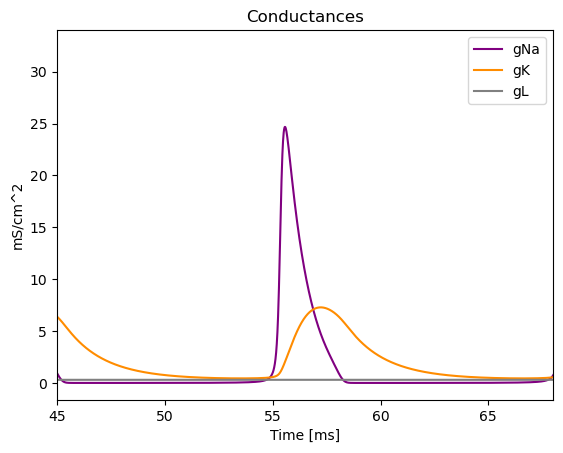

In [40]:
# Call the function HH

# Define the following values as our "default" values
I0 = 5    # input current of 5
T0 = 100  # simulation duration of 100
gK0=15    # max potassium conductance of 15
gNa0=120  # max potassium conductance of 120

# Call the function HH
[V,m,h,n,t]=HH(I0,T0,gK0,gNa0)

# Plot voltages
plt.figure()
plt.title("Voltage (mV) vs Time (ms)")
plt.plot(t,V, 'black')
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.show()

# Plot single spike
plt.figure()
plt.title("Voltage (mV) vs Time (ms)")
plt.plot(t,V, 'black')
plt.xlim([45, 68])
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.show()

# Plot gating variables m, h, n
plt.figure()
plt.title("Single Spike AP Dynamics of m, h, n")
plt.plot(t,m,'red', label='m')
plt.plot(t,h,'blue', label='h')
plt.plot(t,n,'green', label='n')
plt.xlim([45, 68])
plt.xlabel('Time [ms]')
plt.legend()
plt.show()


####################
# Plot conductances

# Define conductances
gNa  = gNa0*(m**3)*h                 # Sodium conductance array
gK   = gK0*(n**4)                    # Potassium conductance array
gL  = 0.3*(n/n)                     # Leak conductance array; multiply by 1 (n/n) to create array of equal shape as gK, gNa

# Plot conductances in 1 graph
plt.figure()
plt.title("Conductances")
plt.plot(t,gNa,'purple', label='gNa')#... and plot the sodium conductance,
plt.plot(t,gK, 'darkorange', label='gK') #... and plot the potassium conductance,
plt.plot(t,gL, 'gray', label='gL') #... and plot the leak conductance.
plt.xlim([45, 68])
plt.xlabel('Time [ms]')             #... label the x-axis.
plt.ylabel('mS/cm^2')               #... and label the y-axis.
plt.legend()                        #... make a legend.
plt.show()


___

#### **Revisit Challenge 1 Questions:**

**1. Describe the dynamics during an action potential in the HH model.**

   From the action potentials (APs) produced by the Hodgkin-Huxley (HH) model, we see persistent firing activity over a duration of 100 milliseconds (ms). Here we used an input current of 5, maximum potassium conductance of 15, and maximum sodium conductance of 120. During a single action potential, the cell depolarizes to approximately -50 mV, then hyperpolarizes to approximately -75 mV before returning to resting potential. The neuron spikes at a rate of ~80 spikes per second.

**2. How does the voltage change?**

   Due to the input current, the voltage increases (becomes less negative) during the depolarization phase of the AP to approximately -50mV, then hyperoplarizes to approximately -75mV.

**3. How do the gates open and close?**

   As the neuron depolarizes, we see a rise in m (sodium activation variable). This causes sodium gates to open, causing sodium ions to rush into the cell. Since sodium (Na+) is a positively charged ion, this causes the intracellular environment to become more positive and the neuron depolarizes (membrane potential becomes less negative). During this time, we also see a sharp decrease in the sodium inactivation variable, h, indicating that sodium channels are not inactivated during depolarization.

   Shortly after the cell spikes, we see a sharp decrease in m and increase in h, in which sodium channels become temporarily inactivated. We also see a rise in the potassium gating variable. Notably, potassium channels do not inactivate (only sodium channels do) during the AP. This rise in variable n occurs shortly after the peak of the AP, following the peak of variable m. This indicates the role of potassium in reactivation, following the depolarization phase, in which the activation of potassium channels causes potassium to flood out of the cell. This causes the cell to become more negative, since potassium (K+) ions are positively charged. Since the cell loses positive ions, the intracellular environment becomes more negative, shown by a decrease in membrane potential (ie voltage; mV).

**4. How do the ions flow?**

   The channel conductances affect the flow of ions during an AP produced by the HH model. With the depolarization of the cell, we see a sharp increase in sodium conductance gNa. The peak voltage / spike of the AP is followed shortly by a relatively smaller and slower increase in potassium conductance gK. During repolarization, the potassium conductance increases as the sodium conductance falls quickly. In this model, the leak conductance is a constant variable and remains the same value during the AP. gNa and gK change duirng the AP dependent on gating variables m, h, and n which are dependent on voltage and time.
   
   During depolarization, sodium channels open causing positive sodium ions to flow into the cell. This results in the intracellular environment to become more positive. Shortly following the peak of depolarization, potassium channels open, causing potassium to rush out of the cell, resulting in an outward current of K+, causing the intracellular environment to become more negative. After depolarization, sodium channels are also temporarily inactivated. The gating (inactivation/activation) of sodium channels and the open/closing of potassium channels allows the neuron to spike and reset to resting potential.
   

<pre>
    
</pre>

___

<pre>
    
</pre>

## <span style="color:cornflowerblue"><ins>**Challenge 2**</ins></span>

**This section will address:**

1. Determine how the firing rate of the HH model varies with input current I.

2. Plot the firing rate versus I (i.e., plot the “f-I curve”).

___

#### **Define a function which computes the firing rate using HH model.**

Firing rate:  80.0  (initial  vals I0=5, gK0=15, gNa0=120)


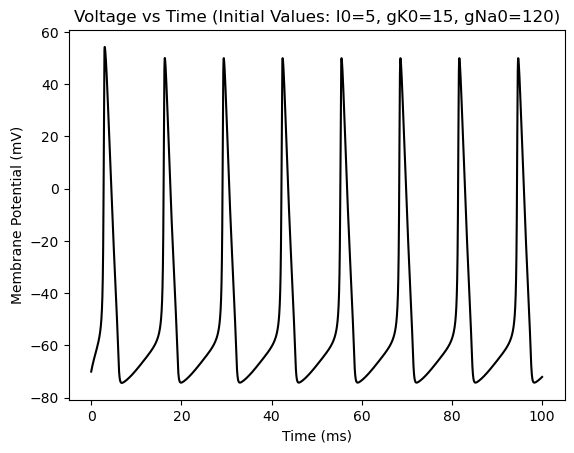

In [107]:
"""
Define a function to compute the firing rate of a HH model.

Args:
I0 -- input current
T0 -- duration of simulation, to be converted to milliseconds by time step dt

Returns:
firing_rate --- firing rate (spikes per second)
t --- time array (ms)
V --- voltage array
"""

def HH_firingrate(I0, T0, gK0_i, gNa0_i):

    # Define biological constants
    gNa0 = gNa0_i   # sodium conductance [mS/cm^2]
    ENa  = 125;     # equilibrium or Nernst potential for sodium [mV]
    gK0  = gK0_i;   # potassium conductance [mS/cm^2]
    EK   = -12;     # equilibrium or Nernst potential for potassium [mV]
    gL0  = 0.3;     # leak conductance [mS/cm^2]
    EL   = 10.6;    # equilibrium or Nernst potential for leak [mV]

    # Define a maximum duration of the simulation in milliseconds
    dt = 0.01;   # time step
    T  = int(np.ceil(T0/dt))  # [ms]

    # Initialize an array of times, voltages, activation/inactivation variables (m, h, n)
    t = np.arange(0,T)*dt
    V = np.zeros([T,1])
    m = np.zeros([T,1])
    h = np.zeros([T,1])
    n = np.zeros([T,1])

    # Define initial values for voltages, activation/inactivation variables (m, h, n)
    V[0]=-70.0
    m[0]=0.05
    h[0]=0.54
    n[0]=0.34

    # Apply a numerical method (forward Euler) to compute the next value in the arrays for:
    for i in range(0,T-1):
        
        # Voltage
        V[i+1] = V[i] + dt*(gNa0*m[i]**3*h[i]*(ENa-(V[i]+65)) + gK0*n[i]**4*(EK-(V[i]+65)) + gL0*(EL-(V[i]+65)) + I0);

        # Sodium activation
        m[i+1] = m[i] + dt*(alphaM(V[i])*(1-m[i]) - betaM(V[i])*m[i]);

        # Sodium inactivation
        h[i+1] = h[i] + dt*(alphaH(V[i])*(1-h[i]) - betaH(V[i])*h[i]);

        # Potassium activation
        n[i+1] = n[i] + dt*(alphaN(V[i])*(1-n[i]) - betaN(V[i])*n[i]);

    # Create voltage array (list of voltages)
    voltages=[]
    for i in range(V.size):
        voltages.append(V[i][0])

    
    ###############################
    
    # Compute the firing rate
    
    # initialize spike count at 0
    spike_count=0

    # find_peaks(voltages)[0] gives the indices in which there are peaks in the voltage array
    # find_peaks(voltages)[0].size gives the number of peaks in the voltage array
    for i in find_peaks(voltages)[0]:  # for each index in which there is a peak in the voltage array,
        if voltages[i] >= 0:           # if the peak is a positive voltage, then this is a spike
            spike_count+=1             # increase spike count by 1.
    
    firing_rate = spike_count/.1  # spikes/second

    return firing_rate,t,V



#################
# Call function HH_firingrate

# frate_i represents the firing rate for iniital input values: gK0=15, gNa0=120, I0=5, T0=100
# t_i represents time array for iniital input values: gK0=15, gNa0=120, I0=5, T0=100
# V_i represents voltage array for for iniital input values: gK0=15, gNa0=120, I0=5, T0=100
frate_i,t_i,V_i = HH_firingrate(5,100,15,120)

print("Firing rate: ", frate_i, " (initial  vals I0=5, gK0=15, gNa0=120)")

plt.figure()
plt.title("Voltage vs Time (Initial Values: I0=5, gK0=15, gNa0=120)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.plot(t_i,V_i, 'black')
plt.show()


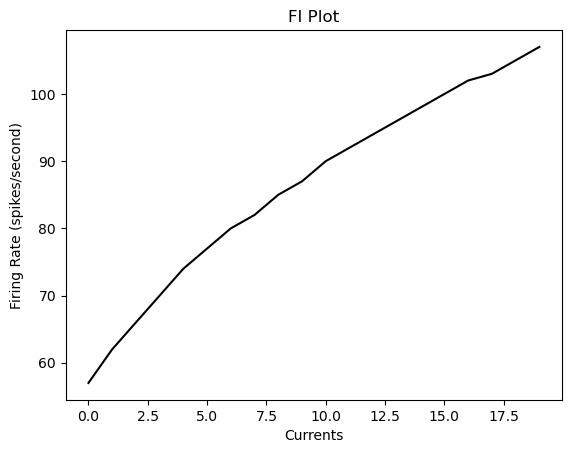

In [111]:
# Initialize arrays of currents, firing rates
arr_I = []
arr_frates = []
T0 = 1000

for i in range(0,20):
    arr_I.append(i)

# Recursively call the HH_firingrate(I0,T0) function.
for i in arr_I:
    arr_frates.append((HH_firingrate(i,T0,15,120)[0])/10)
    # print(arr_frates)

plt.figure()
plt.title("FI Plot")
plt.xlabel("Currents")
plt.ylabel("Firing Rate (spikes/second)")
plt.plot(arr_I, arr_frates, 'black')
plt.show()


___

#### **Answer questions from Challenge 2:**

**1. Determine how the firing rate of the HH model varies with input current I.**

   The overall firing rate increases with input current. At lower input currents, there is a sharper increase in firing rate. At higher input currents, the firing rate of the cell levels out.

**2. Plot the firing rate versus I (i.e., plot the “f-I curve”).**

   See above

<pre>
    
</pre>

___

<pre>
    
</pre>

## <span style="color:cornflowerblue"><ins>**Challenge 3**</ins></span>

**Let's address:**

1. How does the firing rate of the HH model change as you increase the potassium conductance?

3. Provide a “simulation” explanation and a “physical” explanation.

___

#### **Begin by calling HH_firingrate function using an increased value of gK0=35 (rather than gK0=15).**

Firing rate:  80.0  (gK0=15) (initial values)
Firing rate:  60.0  (gK0=35) (increased gK0) 



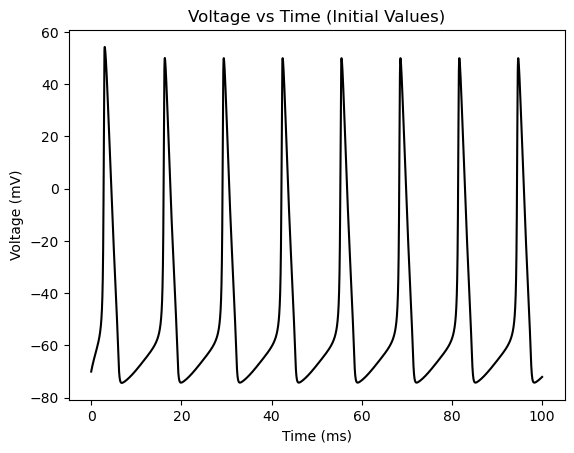

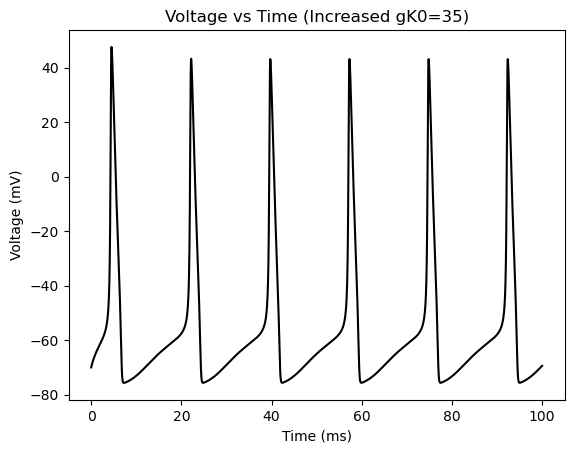

In [77]:
# Call HH_firingrate(I0,T0,gK0_i,gNa0_i) function
# Increase gK0 from 15 to 35.

frate_gK0_35,t_gK0_35,V_gK0_35 = HH_firingrate(5,100,35,120)

print("Firing rate: ", frate_i, " (gK0=15) (initial values)")
print("Firing rate: ", frate_gK0_35, " (gK0=35) (increased gK0) \n")

plt.figure()
plt.title("Voltage vs Time (Initial Values)")
plt.plot(t_i,V_i, 'black')
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.show()

# Plot voltage vs time for increased gK0=35
plt.figure()
plt.title("Voltage vs Time (Increased gK0=35)")
plt.plot(t_gK0_35,V_gK0_35, 'black')
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.show()


___

#### **Answer Challenge 3 Questions:**

**1. How does the firing rate of the HH model change as you increase the potassium conductance?**

   From the simulation above, at relatively lower levels of potassium conductance (i.e. gK0=15), we can observe a higher firing rate of approximately 80 spikes per second. By keeping all other biological parameters the same but only changing gK0 to 35, we see a slower firing rate of approximately 60 spikes per second. With increased potassium conductance, the firing rate decreases. We also observe more depolarization in the lower potassium conductance spike train, in which APs depolarize to ~+50mV, whereas higher potassium conductance causes the neuron to depolarize to a lower voltage at ~+45mV.

**2. Provide a “simulation” explanation and a “physical” explanation.**

   <em>Simulation explanation:</em> From the simulation above, the only changed values between the two plots above are the maximum conductance for potassium, gK0. Comparing the two plots, we see a slower firing rate in the plot with increased gK0, a steeper repolarization, and a slower recovery time. This is due to how gK0 is applied in the potassium component of the HH voltage equation, and the potassium gating variable, n, expressed as the probability n^4. Notably, n is a differential equation that is dependent on the voltage and time.

   <em>Physical explanation:</em> From the plot titled "Conductances" above, the sodium conductance gNa peaks with the depolarization of the neuron, briefly followed by a rise in potassium conductance gK. In our initial Voltage vs Time plot, the maximum potassium conductance is much lower than the maximum sodium conductance. Potassium conductance represents the ease in which potassium ions can flow through potassium ion channels on the cell membrane. High potassium conductance indicates low potassium resistance, indicating a higher probability of open potassium channels. Higher potassium conductance also suggests potassium ions can flow more easily across the membrane. With increased conductance, it makes sense to see a sharper repolarization phase (when the n gating variable is highest), due to potassium ions flowing out of the cell more quickly. Since potassium ions are rushing out of the cell during repolarization/hyperpolarization, a higher potassium conductance also suggests a slower recovery time, causing the neuron to more slowly reach threshold potential to fire, causing a slower firing rate.

<pre>
    
</pre>

___

<pre>
    
</pre>

## <span style="color:cornflowerblue"><ins>**Challenge 4**</ins></span>

**In Challenge 4, we will address:**

1. How does the firing rate of the HH model change as you increase sodium conductance?

2. Provide a “simulation” explanation and a “physical” explanation.

___

#### **Start by calling the HH_firingrate function with increased gNa0**

Firing rate:  60.0  (gNa0=50) (decreased gNa0)
Firing rate:  80.0  (gNa0=120) (initial values)


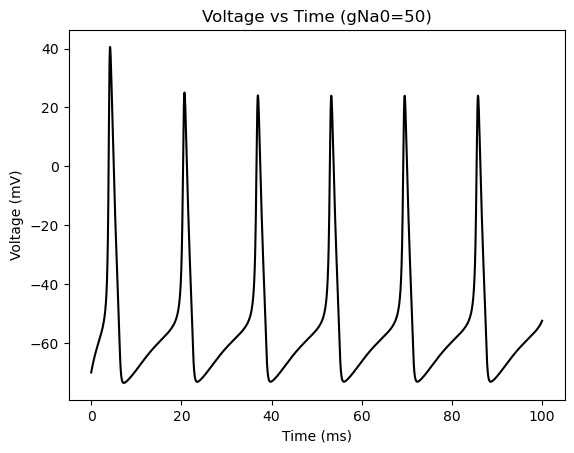

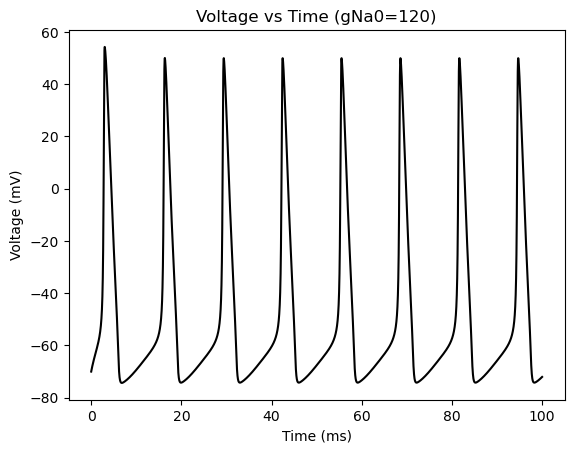

In [75]:
# Call HH_firingrate(I0,T0,gK0_i,gNa0_i) function
# Increase gNa0 from 50 to 120.

frate_gNa0_50,t_gNa0_50,V_gNa0_50 = HH_firingrate(5,100,15,50)

print("Firing rate: ", frate_gNa0_50, " (gNa0=50) (decreased gNa0)")
print("Firing rate: ", frate_i, " (gNa0=120) (initial values)")

# Plot voltage vs time
plt.figure()
plt.title("Voltage vs Time (gNa0=50)")
plt.plot(t_gNa0_50,V_gNa0_50, 'black')
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.show()

plt.figure()
plt.title("Voltage vs Time (gNa0=120)")
plt.plot(t_i,V_i, 'black')
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.show()



___

#### **Answer Challenge 4 Questions:**

1. How does the firing rate of the HH model change as you increase sodium conductance?

   Increased sodium conductance causes the neuron to fire at a higher rate. Additionally, with increased sodium conductance, the neuron depolarizes to a more positive voltage at ~+50mV, compared to ~+25mV in the model with lower sodium conductance. The threshold is also lower for the model with higher sodium conductance.

2. Provide a “simulation” explanation and a “physical” explanation.

   <em>Simulation Explanation:</em> Increasing sodium conductance (variable gNa0 in the simulation) increases the firing rate. In the simulation, the sodium conductance, gNa, is equal to the (maximum sodium conductance; gNa0; a constant) times the (sodium activation gating probability; m^3) times the (sodium inactivation gating variable; h). m and h are also differential equations and dependent on voltage and time. The increase in the maximum sodium conductance, gNa0, causes an increase in the sodium conductance gNa, which increases the change in voltage over time during the repolarization and depolarization phases of an AP.
   
   <em>Physical Explanation:</em> During an AP, sodium conductance (gNa) peaks with the depolarization of the cell (see plot titled "Conductances" above). With higher sodium conductance, this causes the neuron to become more easily excitable, causing the neuron to fire at a lower threshold and to depolarize and repolarize at a faster rate.

<pre>
    
</pre>
